In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

#### Working with GP Priors

In [2]:
x = np.random.rand(200)*10 - 5
x = np.sort(x)

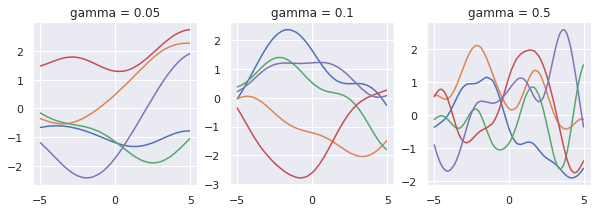

In [3]:
gamvals = [0.05, 0.1, 0.5]
alpha = 1
N = len(x)
idx = 1
plt.subplots(1, 2, figsize=(10, 3))

for gam in gamvals:
    C = np.zeros((N, N))
    for n1 in range(N):
        for n2 in range(N):
            C[n1, n2] = alpha*np.exp(-gam*(x[n1] - x[n2])**2)
    C = C + 1e-6*np.eye(N)
    f = np.random.multivariate_normal(np.zeros(N), C, 5)
    
    plt.subplot(1, 3, idx)
    for i in range(5):
        plt.plot(x, f[i])   
        plt.title('gamma = {}'.format(gam))
    idx += 1
plt.show()

(5, 100)


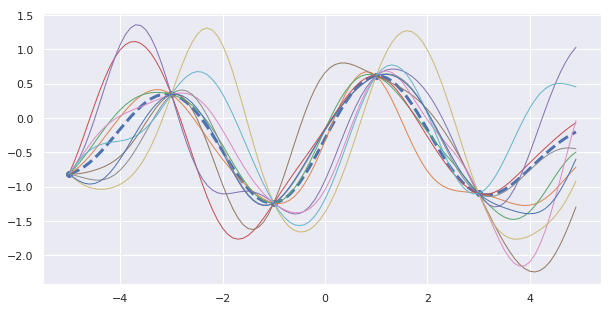

In [4]:
alpha = 1.0
gamma = 0.5

plt.figure(figsize=(10, 5))

x = np.arange(-5, 5, 2)
num_training_points = len(x)

left = np.array([x, ]*num_training_points).T
right = np.array([x, ]*num_training_points)
C = alpha*np.exp(-gamma*(left - right)**2)

mu = np.zeros(num_training_points)

true_f = np.random.multivariate_normal(mu, C)
test_points = np.arange(-5, 5, 0.1)#np.array([-4,-2,0,2,4])
num_test_points = len(test_points)

plt.scatter(x, true_f)

y_sorted = np.sort(true_f)
y_min = y_sorted[0]
y_max = y_sorted[-1]

#for test_point in test_points:
    #plt.plot((test_point, test_point), (-5, 5), '--k')


# now we need to calculate R and C*
a = np.array([x, ]*num_test_points).T
b = np.array([test_points, ]*num_training_points)
R = alpha*np.exp(-gamma*(a - b)**2)
print(R.shape)

test_left = np.array([test_points, ]*num_test_points).T
test_right =  np.array([test_points, ]*num_test_points)
C_star = alpha*np.exp(-gamma*(test_left - test_right)**2)

pred_mu = R.T @ np.linalg.inv(C) @ true_f
pred_sigma = C_star - R.T @ np.linalg.inv(C) @ R

plt.plot(test_points, pred_mu, '--', linewidth=3 )

sample = np.random.multivariate_normal(pred_mu, pred_sigma, 10)

# x = np.random.rand(100)*10 - 5
# x = np.sort(x)
for idx, s in enumerate(sample):
    plt.plot(test_points, s, linewidth=1)

plt.show()